## Clustering Algos 

1. Partition based (K-means)

2. Density based (DBSCAN)

3. Hierarchical (Agglomerative/divisive)

4. Model based (Gaussian Mixture Models)

#### Hierarchical Clustering - Agglomerative:

Hierarchy of clusters are formed. We follow a bottom top approach
1. Initially we see there are 5 points, 5 clusters 
2. Then according to the affinity of each points the clusters are narrowed down to say 4 
3. Then to 3 and so on till you get the minimum number of clusters 
4. This is called the bottom top approach 

#### Hierarchical Clustering - Divisive:

Exact Opposite of Aglomerative. You have 1 cluster. You further divide it to 2, then 3 then 4 and so on. 5 clusters for say 5 different customers 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Accessing the Dataset 

In [4]:
cust = pd.read_csv('wholesale_customers.csv')

In [6]:
cust

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### As you can see there is no target column - This is unsupervised learning, so we use clustering

## Standardisation of the features 

In [9]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(cust)
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## Converting the X to a DataFrame 

In [10]:
X = pd.DataFrame(X, columns=cust.columns)

In [11]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


## Drawing Dendrogram

#### sklearn does have the provision of making a Dendrogram 

#### So we use 'scipy'

In [15]:
import scipy.cluster.hierarchy as sch

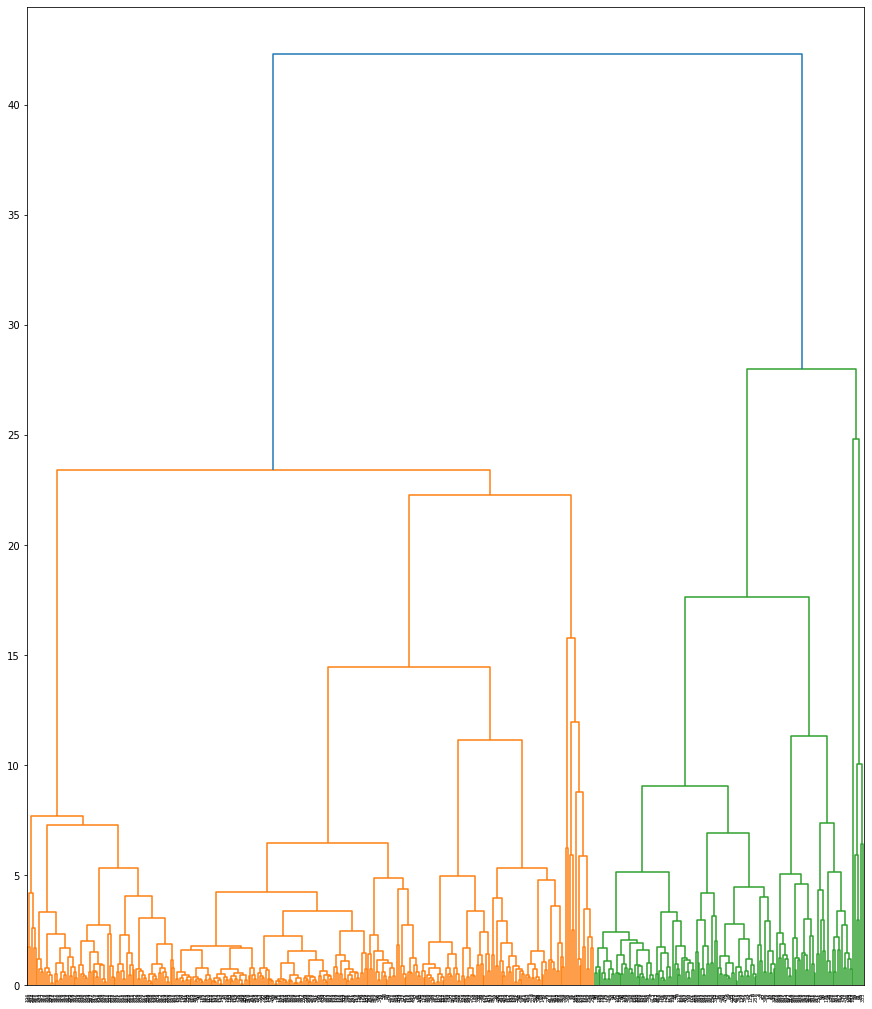

In [19]:
plt.figure(figsize=(15,18))
dendro = sch.dendrogram(sch.linkage(X,method='ward'))

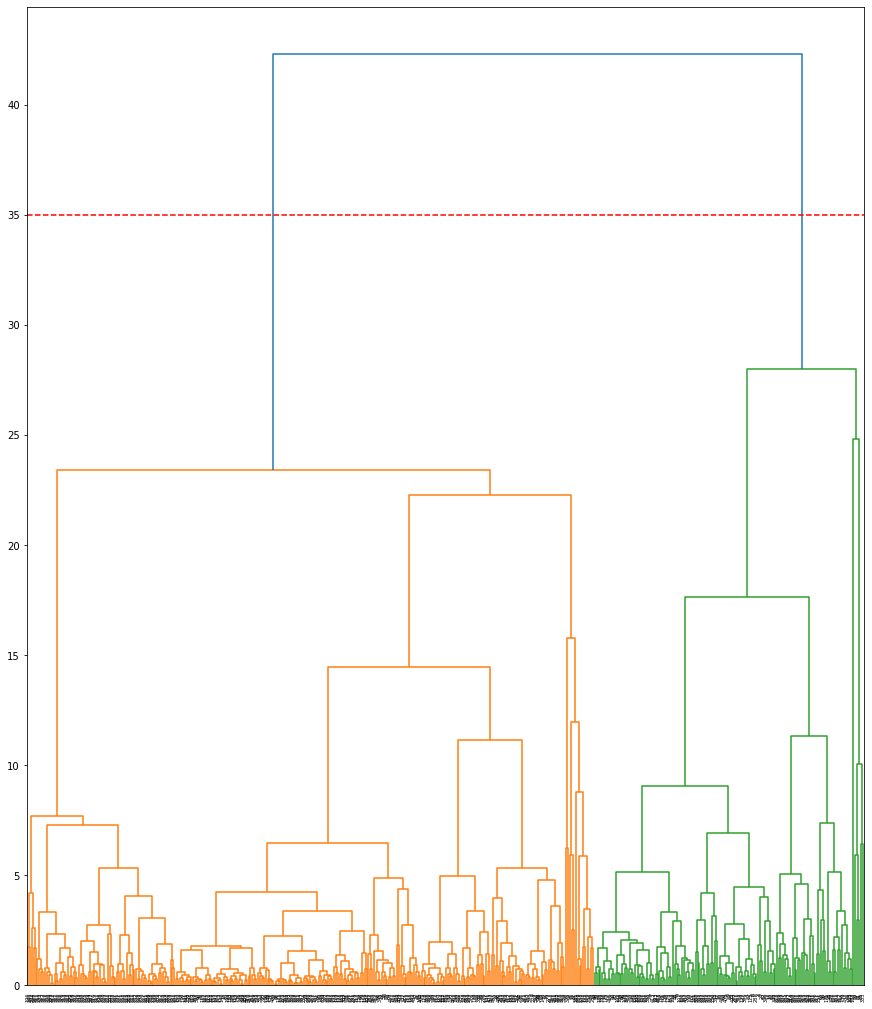

In [21]:
# Drawing a Horizontal Line on the graph 

plt.figure(figsize=(15,18))
dendro = sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35, color='red',linestyle='--'); # Drawing a horizontal line at y=35 

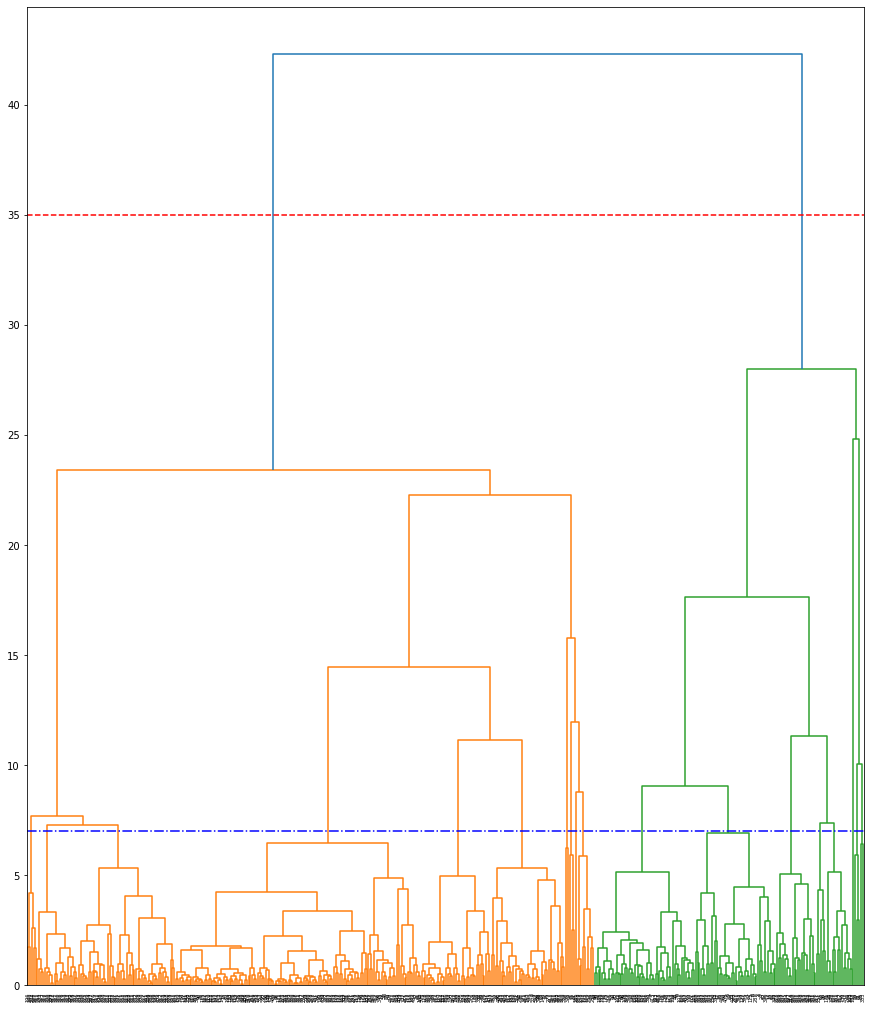

In [23]:
# Drawing a Horizontal Line on the graph 

plt.figure(figsize=(15,18))
dendro = sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35, color='red',linestyle='--'); # Drawing a horizontal line at y=35 
plt.axhline(y=7, color='blue',linestyle='-.'); # Drawing a horizontal line at y=35 

## Agglomerative Clustering using sklearn

In [24]:
from sklearn.cluster import AgglomerativeClustering 

In [25]:
clust = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [26]:
clust.fit_predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [27]:
clust.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

## Adding cluster labels to the DataFrame 

In [33]:
X['Label'] = clust.labels_

In [39]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


## Analysis of the Segmentation

In [40]:
# Find the number of customers in each segment 

X['Label'].value_counts()

1    298
0    142
Name: Label, dtype: int64

In [42]:
# List the customers who belong to the Segment 0 

X[X['Label']==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,1.448652,0.590668,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
...,...,...,...,...,...,...,...,...,...
418,1.448652,0.590668,-0.897676,0.365944,1.124138,-0.606071,0.810196,-0.265849,0
421,1.448652,0.590668,0.400754,-0.128767,0.116064,-0.420884,0.112024,0.091991,0
423,1.448652,0.590668,0.440491,-0.286255,-0.347045,-0.415110,-0.226458,-0.304189,0
424,1.448652,0.590668,0.394184,-0.395045,0.450965,-0.453261,0.069609,-0.452934,0


In [43]:
# List the customers who belong to the Segment 1 

X[X['Label']==1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
8,-0.690297,0.590668,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,1
15,-0.690297,0.590668,-0.138313,-0.635143,-0.435116,-0.551629,-0.402629,-0.395069,1
17,-0.690297,0.590668,-0.484788,0.048933,-0.528665,-0.460479,-0.527355,1.048362,1
19,-0.690297,0.590668,-0.334071,-0.447812,0.159362,-0.495536,-0.076325,-0.363474,1
...,...,...,...,...,...,...,...,...,...
434,-0.690297,0.590668,0.374473,-0.254242,0.004501,-0.491618,-0.107192,-0.243839,1
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

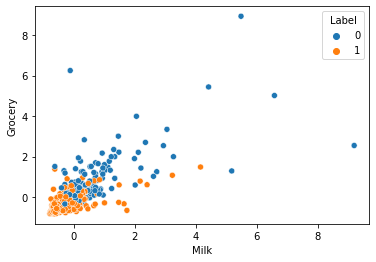

In [53]:
# What is the Byuing pattern of milk and grocery 

sns.scatterplot(data=X, x='Milk', y='Grocery', hue='Label')

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

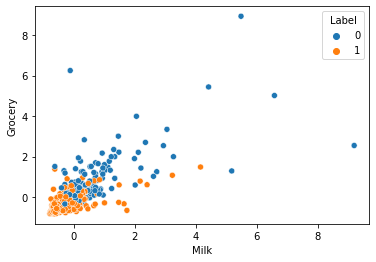

In [55]:
# Another way to do the same

sns.scatterplot(x=X['Milk'], y=X['Grocery'], hue=X['Label'])

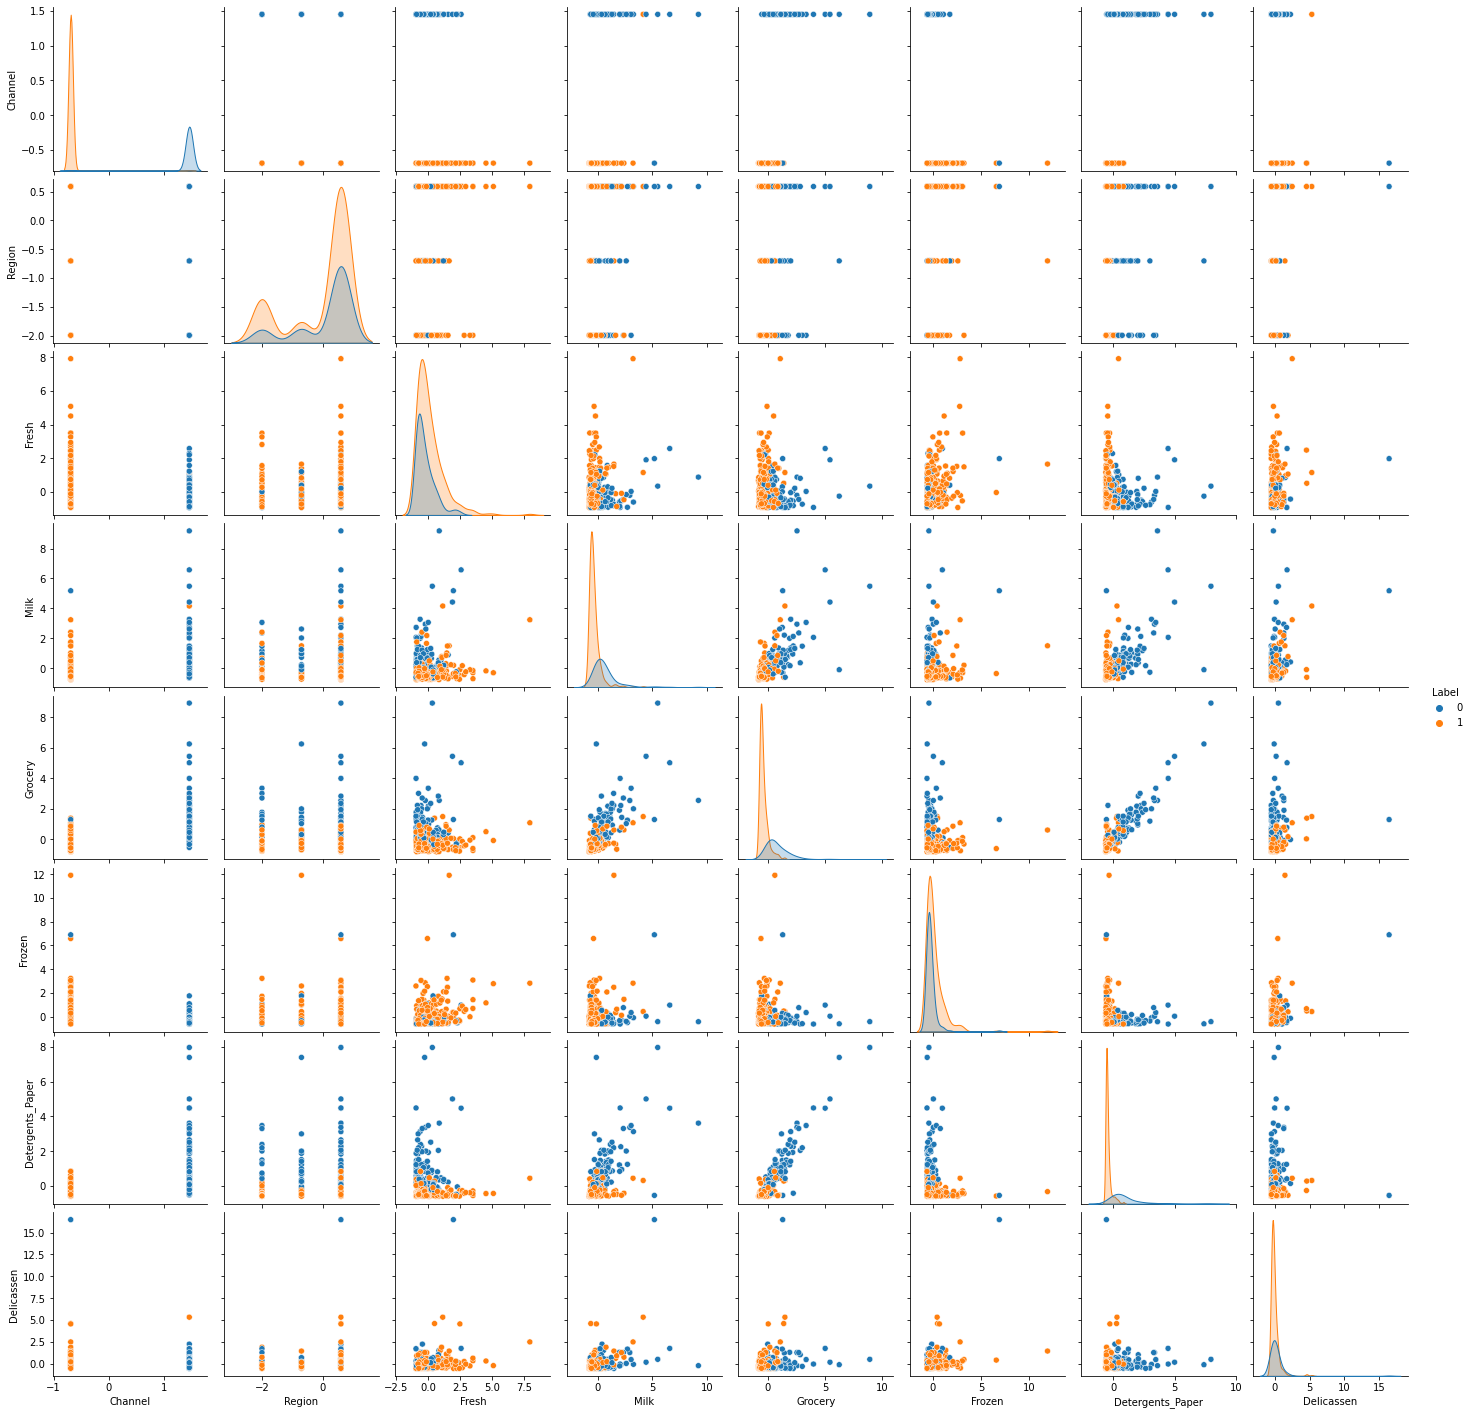

In [59]:
sns.pairplot(X,hue='Label');